In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %config InlineBackend.figure_formats = ['svg']
sns.set(style="white")
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import seaborn_figure_settings

In [244]:
import os
save_dpath = os.path.join('../notebooks/figures/', 'fig_rerun')
os.makedirs(save_dpath,exist_ok=True)

In [5]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [6]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [7]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [8]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [9]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [10]:
dpath = '../results/rerun_sensitivity_init/biogeo/'
fpath_ponly = '../results/rerun_sensitivity_ponly/clean/biogeo_rerun_sensitivity_ponly.csv.gz'

In [11]:
dpath

'../results/rerun_sensitivity_init/biogeo/'

In [12]:
os.listdir(dpath)

['biogeo_rerun_het_CP13_init.csv.gz',
 'biogeo_rerun_het_BP05_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC2500_init.csv.gz',
 'biogeo_rerun_het_DOC2500_init.csv.gz',
 'biogeo_rerun_het_DIN800_init.csv.gz',
 'biogeo_rerun_het_BP14_init.csv.gz',
 'biogeo_rerun_het_DOC2750_init.csv.gz',
 'biogeo_rerun_het_DOC160_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC2750_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC160_init.csv.gz']

In [13]:
fnames = [
 'biogeo_rerun_het_DIN800DOC2750_init.csv.gz',
 'biogeo_rerun_het_DOC2750_init.csv.gz',
 'biogeo_rerun_het_DIN800_init.csv.gz',
 'biogeo_rerun_het_DOC160_init.csv.gz',
 'biogeo_rerun_het_DIN800DOC160_init.csv.gz']
def _readvfile(fname):
    category = fname.replace(dpath,'').replace('biogeo_rerun_het_','').replace('_init.csv.gz','')
    print (fname, category)
    df = pd.read_csv(fname)
    df['Category'] = category
    return df
comb_df = pd.concat([_readvfile(os.path.join(dpath,f)) for f in fnames], ignore_index=True)


../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800DOC2750_init.csv.gz DIN800DOC2750
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DOC2750_init.csv.gz DOC2750
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800_init.csv.gz DIN800
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DOC160_init.csv.gz DOC160
../results/rerun_sensitivity_init/biogeo/biogeo_rerun_het_DIN800DOC160_init.csv.gz DIN800DOC160


In [14]:
orig_fpath = '../results/final/het/biogeo/biogeo_monte_het_clean.csv.gz'

orig_comb_df = pd.read_csv(orig_fpath)
orig_comb_df['Category'] = 'Original'

In [15]:
comb_df = pd.concat([comb_df, orig_comb_df], ignore_index=True).copy()

In [16]:
comb_df

,model,Phase,VPRO,Versatile,run_id,y_pred,Sample,max_prob,Bp Final,Np Final,...,deathC_DOCp Integrated,deathC_DOCh Integrated,deathN_DONp Integrated,deathN_DONh Integrated,PP,Total N uptake,PP / total fixed C,N reuse,Category,Unnamed: 0
0,EXOENZYME,init,vpro_11_62_EXOENZYME_C1,True,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Strong,5x5_21A0,0.987366,1.253719,0.248321,...,13617.294756,6590.492492,1610.627040,1656.135686,20019.118122,3720.993564,3.912948,36.126151,DIN800DOC2750,NaN
1,EXOENZYME,init,vpro_17_89_EXOENZYME_C2,False,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Neutral,1B0,0.986512,0.001711,0.000353,...,559.555587,1528.220820,80.774721,342.450762,4033.645459,2144.920821,0.883599,20.824474,DIN800DOC2750,NaN
2,EXOENZYME,init,vpro_17_89_EXOENZYME_C2,False,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Neutral,1B0,0.986938,0.004032,0.000833,...,693.218848,8065.775831,98.545261,1444.839854,4850.663199,2386.542976,0.910909,23.170320,DIN800DOC2750,NaN
3,EXOENZYME,init,vpro_23_76_EXOENZYME_C2,True,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Strong,5x5_16A0,0.988300,10.939298,1.198924,...,17405.198448,6236.388123,2258.588427,1633.884982,30029.073031,4121.260652,5.540297,40.012239,DIN800DOC2750,NaN
4,EXOENZYME,init,vpro_24_46_EXOENZYME_C3,False,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Other,NaN,0.992522,0.009203,0.000652,...,4222.448885,1952.816333,469.745955,479.537236,7869.018843,1566.066087,1.972425,15.204525,DIN800DOC2750,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96745,ROS,init,vpro_90_89_ROS_C0,False,monte_ROS_9_monte_vpro_90_89_ROS_C0_88_lowN_al...,Other,NaN,0.960867,1.013443,0.037834,...,803.430165,242.160264,85.212505,60.788647,1961.702629,255.922500,4.850713,2.484684,Original,1074725.0
96746,ROS,init,vpro_90_89_ROS_C0,False,monte_ROS_9_monte_vpro_90_89_ROS_C0_94_lowN_al...,Other,NaN,0.669145,0.495295,0.018583,...,760.389764,115.224245,80.687292,29.017377,1809.318504,343.327317,3.481135,3.333275,Original,795070.0
96747,ROS,init,vpro_90_89_ROS_C0,False,monte_ROS_9_monte_vpro_90_89_ROS_C0_9_lowN_all...,Other,NaN,0.586460,0.898365,0.036829,...,798.088280,254.017632,84.907403,63.849000,1808.768714,215.899089,4.606092,2.096108,Original,809056.0
96748,ROS,init,vpro_93_82_ROS_C1,False,monte_ROS_9_monte_vpro_93_82_ROS_C1_55_lowN_al...,Weak,11A0,0.988714,0.028025,0.005737,...,78.055857,24.865020,10.019750,6.474009,835.946378,136.835560,1.078033,1.328501,Original,2463390.0


In [17]:
ponly_df = pd.read_csv(fpath_ponly)
ponly_df.head()

,Bp Final,Np Final,Cp Final,DON Final,RDON Final,DIN Final,DOC Final,RDOC Final,DIC Final,ROS Final,...,ROSproductionp Integrated,ROSlossp Integrated,DON2DIN Integrated,additionalLossRatep Integrated,deathC_DOCp Integrated,deathN_DONp Integrated,PP,Total N uptake,PP / total fixed C,N reuse
0,1.600530,0.334896,5.821358,612.336893,189.611174,0.009364,4733.685551,1143.421388,2142.351206,0.2,...,0.0,0.0,149.110450,0.0,4525.347401,740.533367,7012.271902,904.744100,1.189825,8.783923
1,0.361692,0.089151,0.690842,168.027087,635.405893,0.009034,1238.937687,3313.848383,2219.333311,0.2,...,0.0,0.0,41.860654,0.0,1054.058014,203.579226,5003.948473,798.195480,1.098351,7.749471
2,1.462192,0.116861,4.788415,190.822231,611.486075,0.005499,1646.095243,3860.683585,2207.806046,0.2,...,0.0,0.0,47.560122,0.0,1484.380044,236.522226,8468.649990,774.428339,1.533827,7.518722
3,1.316971,0.357121,4.121376,686.413645,115.760807,0.044313,5770.460137,780.071305,2141.098618,0.2,...,0.0,0.0,149.157960,0.0,5626.667258,843.283484,7300.551422,966.417130,1.112316,9.382691
4,0.310921,0.064292,0.760886,117.315371,686.201448,0.000825,918.002048,3588.813294,2224.500078,0.2,...,0.0,0.0,30.618725,0.0,758.358249,142.332636,5383.933949,833.014369,1.193873,8.087518


In [18]:
ponly_df[['id', 'media', 'which', 'model', 'hash']] =     ponly_df.run_id.str.rsplit('_', n=4, expand=True)


In [19]:
ponly_df['Category'] = ponly_df['id'].str.split('_', expand=True)[2]


In [20]:
media_order = ['Original',
               'DOC160', 'DOC2750', 'DIN800DOC160',  'DIN800', 'DIN800DOC2750',  ]

In [21]:
PCOLOR = '#A0E34D'
HCOLOR = '#D6AE5F'


In [22]:
DEFAULT_DOC = 20
DEFAULT_DIN = 100
docmap ={
    'Original' : DEFAULT_DOC,
    'DOC160' : 160,
    'DOC2750' : 2750, 
    'DIN800DOC160' : 160,  
    'DIN800' : DEFAULT_DOC, 
    'DIN800DOC2750' : 2750,
}
dinmap ={
    'Original' : DEFAULT_DIN,    
    'DOC160' : DEFAULT_DIN,
    'DOC2750' : DEFAULT_DIN, 
    'DIN800DOC160' : 800,  
    'DIN800' : 800, 
    'DIN800DOC2750' :800,
}


In [23]:
comb_df['DOC'] = comb_df['Category'].map(docmap)
comb_df['DIN'] = comb_df['Category'].map(dinmap)

In [24]:
ponly_df['DOC'] = ponly_df['Category'].map(docmap)
ponly_df['DIN'] = ponly_df['Category'].map(dinmap)

In [25]:
ponly_df[['Category', 'DIN', 'DOC']].value_counts()

Category       DIN    DOC   
DIN800         800.0  20.0      163
DIN800DOC160   800.0  160.0     163
DIN800DOC2750  800.0  2750.0    163
DOC160         100.0  160.0     163
DOC2750        100.0  2750.0    163
Original       100.0  20.0      163
Name: count, dtype: int64

In [26]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Bp Final', 'Np Final',
       ...
       'deathN_DONp Integrated', 'deathN_DONh Integrated', 'PP',
       'Total N uptake', 'PP / total fixed C', 'N reuse', 'Category',
       'Unnamed: 0', 'DOC', 'DIN'],
      dtype='object', length=129)

In [27]:
def _change_col(c):
    suffixes = ('Integrated','Final')
    for suffix in suffixes:
        s = f' {suffix}'
        if c.endswith(s):
            c = c.replace(s, '')
            c= f'{suffix} {c}'
            return c
    return c
comb_df.rename(columns={c:_change_col(c) for c in comb_df.columns}, inplace=True)


In [28]:
ponly_df.rename(columns={c:_change_col(c) for c in ponly_df.columns}, inplace=True)


In [29]:
comb_df['Final Organic C'] = comb_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]', 'Final Bhtotal[C]', ]].sum(axis=1)
comb_df['Integrated N uptake'] = comb_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp', 
                                          'Integrated gross_uptakeINh', 'Integrated gross_uptakeONh',  ]].sum(axis=1)

comb_df['Integrated C Biomassp'] = comb_df['Integrated Bptotal[C]']
comb_df['Integrated C Biomassh'] = comb_df['Integrated Bhtotal[C]']
comb_df['Integrated N Biomassp'] = comb_df['Integrated Bptotal[N]']
comb_df['Integrated N Biomassh'] = comb_df['Integrated Bhtotal[N]']



In [30]:
ponly_df['Final Organic C'] = ponly_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]',  ]].sum(axis=1)
comb_df['Integrated N uptake'] = ponly_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp',   ]].sum(axis=1)

ponly_df['Integrated C Biomassp'] = ponly_df['Integrated Bptotal[C]']
ponly_df['Integrated N Biomassp'] = ponly_df['Integrated Bptotal[N]']



In [31]:
comb_df['Final Het/Pro'] = comb_df['Final Bhtotal[N]'].div(comb_df['Final Bptotal[N]'])

In [32]:
value_cols = [
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',

 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',

 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'
]



In [33]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'   
]:
    comb_df[i] = comb_df[i].div(comb_df.t) 

In [34]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated N Biomassp',
]:
    ponly_df[i] = ponly_df[i].div(ponly_df.t) 

In [35]:
comb_df.rename(columns={c: c.replace('gross_uptake', 'Uptake ') for c in comb_df.columns}, inplace=True)

In [54]:
ipalette = ["#0072B2", "#D55E00", "#F0E442", '#999999' ,'#009e73']
ipalette = ['#3366CC','#FF9900', '#999999']
#ipalette = ["#A3C1DA", "#F4A582", "#D5D5D5"]
iorder = ['Negative',  'Neutral', 'Positive', ]
ipalette = sns.color_palette('coolwarm_r', n_colors=3).as_hex()


In [129]:
iorder1=iorder + ['Ctrl']
ipalette1=ipalette + ['black']



# BIO GEO chemical

# total PP and total N uptake

# efficiency 
# Total carbon fixation integrated vs final fixed carbon
# New production N vs recycled production


In [37]:
comb_df['N reuse'] = comb_df['Total N uptake'] / (comb_df['DIN'] + INIT_DON)
ponly_df['N reuse'] = ponly_df['Total N uptake'] / (ponly_df['DIN'] + INIT_DON)


In [38]:
comb_df

,model,Phase,VPRO,Versatile,run_id,y_pred,Sample,max_prob,Final Bp,Final Np,...,Unnamed: 0,DOC,DIN,Final Organic C,Integrated N uptake,Integrated C Biomassp,Integrated C Biomassh,Integrated N Biomassp,Integrated N Biomassh,Final Het/Pro
0,EXOENZYME,init,vpro_11_62_EXOENZYME_C1,True,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Strong,5x5_21A0,0.987366,1.253719,0.248321,...,NaN,2750,800,5116.121557,904.744100,208.774530,639.767371,24.693444,160.768194,6.507637
1,EXOENZYME,init,vpro_17_89_EXOENZYME_C2,False,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Neutral,1B0,0.986512,0.001711,0.000353,...,NaN,2750,800,4565.017759,798.195480,39.745379,73.207447,5.737449,16.404662,0.496258
2,EXOENZYME,init,vpro_17_89_EXOENZYME_C2,False,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Neutral,1B0,0.986938,0.004032,0.000833,...,NaN,2750,800,5325.078743,774.428339,49.239515,85.202734,6.999696,15.262550,0.544441
3,EXOENZYME,init,vpro_23_76_EXOENZYME_C2,True,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Strong,5x5_16A0,0.988300,10.939298,1.198924,...,NaN,2750,800,5420.120010,966.417130,478.061110,837.774214,62.035678,219.490301,3.369280
4,EXOENZYME,init,vpro_24_46_EXOENZYME_C3,False,rerun_het_DIN800DOC2750_monte_EXOENZYME_100_mo...,Other,NaN,0.992522,0.009203,0.000652,...,NaN,2750,800,3989.514545,833.014369,179.660452,182.624726,19.987162,44.845670,1.461714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96745,ROS,init,vpro_90_89_ROS_C0,False,monte_ROS_9_monte_vpro_90_89_ROS_C0_88_lowN_al...,Other,NaN,0.960867,1.013443,0.037834,...,1074725.0,20,100,404.415352,NaN,68.119616,33.448654,7.216004,8.396518,0.967855
96746,ROS,init,vpro_90_89_ROS_C0,False,monte_ROS_9_monte_vpro_90_89_ROS_C0_94_lowN_al...,Other,NaN,0.669145,0.495295,0.018583,...,795070.0,20,100,519.749634,NaN,62.847716,25.951143,6.660635,6.535470,0.794464
96747,ROS,init,vpro_90_89_ROS_C0,False,monte_ROS_9_monte_vpro_90_89_ROS_C0_9_lowN_all...,Other,NaN,0.586460,0.898365,0.036829,...,809056.0,20,100,392.690522,NaN,59.815556,33.644549,6.355711,8.456899,1.061746
96748,ROS,init,vpro_93_82_ROS_C1,False,monte_ROS_9_monte_vpro_93_82_ROS_C1_55_lowN_al...,Weak,11A0,0.988714,0.028025,0.005737,...,2463390.0,20,100,775.436908,NaN,8.587527,3.521709,1.101983,0.917000,0.225703


In [39]:
comb_df['Carbon Use Efficiency'] = comb_df['Final Organic C'].div(comb_df['Integrated Uptake ICp'] )


In [40]:
ponly_df['VPRO_no_cluster'] = ponly_df['id'].str.replace(r'.*_ponly_[^_]*_', 'vpro_', regex=True).str.replace('_monte_', '').str.replace('_OVERFLOW', '_2') + '_'+ ponly_df.model
comb_df['VPRO_no_cluster'] = comb_df['VPRO'].str.replace(r'_C\d+$', '', regex=True)


In [41]:
ponly_df['VPRO_no_cluster'] = ponly_df['id'].str.replace(r'.*_ponly_[^_]*_', 'vpro_', regex=True).str.replace('_monte_', '').str.replace('_OVERFLOW', '_2') + '_'+ ponly_df.model
comb_df['VPRO_no_cluster'] = comb_df['VPRO'].str.replace(r'_C\d+$', '', regex=True)


In [42]:
comb_df.loc[comb_df.Phase.isin(['init'])].VPRO_no_cluster


0        vpro_11_62_EXOENZYME
1        vpro_17_89_EXOENZYME
2        vpro_17_89_EXOENZYME
3        vpro_23_76_EXOENZYME
4        vpro_24_46_EXOENZYME
                 ...         
96745          vpro_90_89_ROS
96746          vpro_90_89_ROS
96747          vpro_90_89_ROS
96748          vpro_93_82_ROS
96749          vpro_97_23_ROS
Name: VPRO_no_cluster, Length: 96750, dtype: object

In [43]:
mergeby_cols = ['VPRO_no_cluster', 'Category', 'DIN', 'DOC']

merge_comb_df = pd.merge(
    comb_df.loc[comb_df.Phase.isin(['init']) & comb_df.model.isin(morder)], 
    ponly_df[mergeby_cols + ['Integrated N Biomassp']], 
    on=['VPRO_no_cluster', 'Category', 'DIN', 'DOC'], 
    how='left', 
    suffixes=('', '_ponly')
)



In [44]:

merge_comb_df['vPro_interaction'] =  merge_comb_df['Integrated N Biomassp'].div(merge_comb_df['Integrated N Biomassp_ponly'])

In [45]:
merge_comb_df['interaction_class'] =  'Neutral'
merge_comb_df.loc[merge_comb_df['vPro_interaction'].lt(0.9), 'interaction_class'] = 'Negative'
merge_comb_df.loc[merge_comb_df['vPro_interaction'].gt(1.1), 'interaction_class'] = 'Positive'


In [241]:
ponly_df['interaction_class'] = 'Ctrl'
merge_comb_df2 = pd.concat([merge_comb_df, ponly_df], ignore_index=True)

In [181]:
max_day_df = pd.read_csv('../results/rerun_sensitivity_init/rerun_sensitivity_init_maxday.csv.gz')
max_day_df.head()


,run_id,model,Category,DIN,DOC,Simulation,num_peaks,max_day,last_day
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,EXOENZYME,Original,100.0,20.0,Coculture,1,5.720139,37.788889
1,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,EXOENZYME,Original,100.0,20.0,Coculture,1,13.695833,25.734722
2,monte_EXOENZYME_100_monte_vpro_17_89_EXOENZYME...,EXOENZYME,Original,100.0,20.0,Coculture,1,6.731944,9.745833
3,monte_EXOENZYME_100_monte_vpro_17_89_EXOENZYME...,EXOENZYME,Original,100.0,20.0,Coculture,1,6.731944,9.745833
4,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,EXOENZYME,Original,100.0,20.0,Coculture,1,8.943750,27.852778


In [182]:
max_day_df = pd.merge(max_day_df, merge_comb_df[['run_id', 'vPro_interaction', 'interaction_class']], on='run_id', how='left')

In [183]:
max_day_df.loc[max_day_df.Simulation.isin(['vPro Monoculture']), 'interaction_class'] = 'Ctrl'

In [184]:
max_day_df.Simulation.value_counts()

Simulation
Coculture           96750
vPro Monoculture     1304
Name: count, dtype: int64

In [185]:
max_day_df['decline_days'] = max_day_df['last_day'] - max_day_df['max_day']
max_day_df.loc[max_day_df['decline_days'].le(0), 'decline_days'] = 0

/tmp/ipykernel_300854/3765484384.py:31: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.stripplot(
/tmp/ipykernel_300854/3765484384.py:31: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.stripplot(


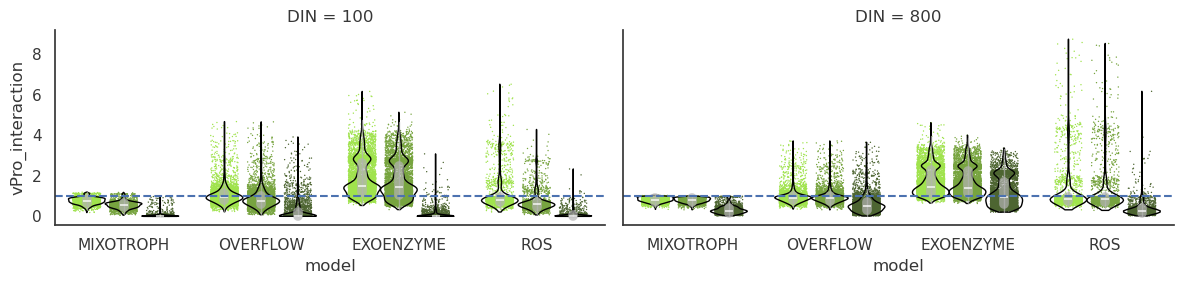

In [46]:
c = 'vPro_interaction'
color = PCOLOR 
palette = sns.dark_palette(color, reverse=True, n_colors=4)
#ymax = 60 if din == 100 else 300
#title = 'vPro Biomass' if strain == 'p' else 'vHet Biomass'

g = sns.catplot(
    data=merge_comb_df, 
     y=c, 
    hue='DOC', #hue_order=gorder1, 
    #palette=gpalette1,
    palette=['black','black','black',],
    x='model', order=morder,
    kind='violin', #split=True,
    aspect=2,
    linewidth=1, 
    height=3,
    #size=4, dodge=True, jitter=0.5,
    #split=True,
    col='DIN',
    common_norm=False, cut=0, density_norm='width',
    fill=None,
    #inner='quart',
     inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
    #log_scale=True,
     #inner_kws=dict( box_width=5, color=".7", ),
    linecolor='grey',
    legend=False,
)
for col_val, ax in g.axes_dict.items():
    sns.stripplot(
        data=merge_comb_df.loc[merge_comb_df.DIN.isin([col_val])], 
         y=c, 
        hue='DOC', #hue_order=gorder1, palette=gpalette1,
        palette=palette,
        x='model', order=morder,
        size=1, dodge=True, jitter=0.3, zorder=-100,
        legend=False,
        ax=ax
    )
    ax.axhline(1, ls='--')

/tmp/ipykernel_300854/2878246140.py:7: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.displot(


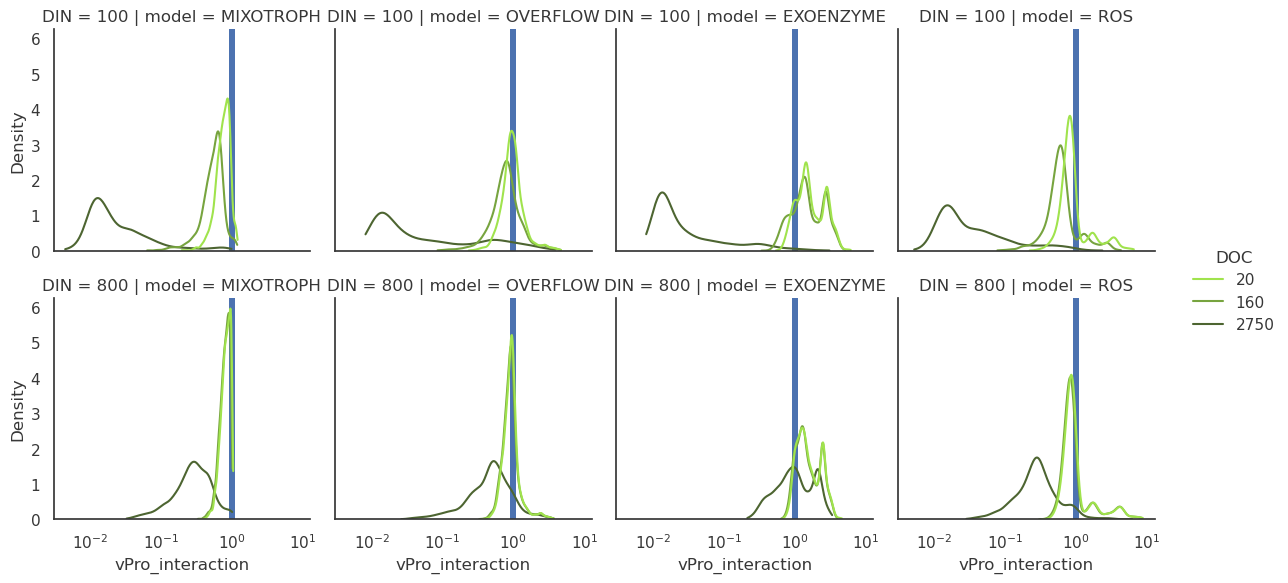

In [47]:
c = 'vPro_interaction'
color = PCOLOR 
palette = sns.dark_palette(color, reverse=True, n_colors=4)
#ymax = 60 if din == 100 else 300
#title = 'vPro Biomass' if strain == 'p' else 'vHet Biomass'

g = sns.displot(
    data=merge_comb_df, 
     x=c, 
    hue='DOC', #hue_order=gorder1, 
    #palette=gpalette1,
    palette=palette,
    kind='kde', #split=True,
    #aspect=2,
    #linewidth=1, 
    height=3,
    #size=4, dodge=True, jitter=0.5,
    #split=True,
    col='model', col_order=morder,
    row='DIN',
    common_norm=False, cut=0, #density_norm='width',
    fill=None,
    log_scale=True,
)
for (row_val, col_val), ax in g.axes_dict.items():
    #ax.axvline(1, ls='--')
    ax.axvspan(0.9,1.1)

In [ ]:
for din in [100,800]:
    g = sns.relplot(
        data=merge_comb_df.loc[merge_comb_df.DIN.isin([din])], 
         y='Integrated N Biomassp', x='Integrated N Biomassh',
        #hue='y_pred', hue_order=list(reversed(gorder)), palette=list(reversed(gpalette)),
        hue='interaction_class', hue_order=iorder, palette=ipalette,
        col='model', col_order=morder, s=4, lw=0.1,
        row='DOC', 
        #row='Category', row_order=media_order[1:],
        legend=False, 
        aspect=0.8, height=1.5,rasterized=True,
        facet_kws=dict(margin_titles=True),
        #color='purple',
    )
    for (row_val, col_val), ax in g.axes_dict.items():
        ax.axline((0,0), (20,20),lw=1, ls='--')
        ponly_values = ponly_df.loc[ponly_df.DIN.isin([din]) & ponly_df.DOC.isin([row_val]) & ponly_df.model.isin([col_val]), 'Integrated N Biomassp']
        ax.axhspan(ponly_values.min(), ponly_values.max(), alpha=0.1, zorder=-100, color='orange')
    
    g.set(ylabel='vPro Biomass\n[µM N]', xlabel='vHet Biomass\n[µM N]', 
          #xlim=(-1,60), 
          #ylim=(-1,60), 
         )
    if (din == 100):
        g.set(xlim=(-1,60), ylim=(-1,60), )
    else:
        g.set(xlim=(-1,300), ylim=(-1,300), )

    g.set_titles(col_template='{col_name}', row_template='DOC = {row_name}')
    plt.suptitle(f'DIN = {din}',y=1.02)
    save_fpath = os.path.join(save_dpath, f'fig_biomass_{din}.svg')
    plt.savefig(save_fpath, format='svg', dpi=1200)            

/tmp/ipykernel_300854/2176499711.py:32: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.stripplot(
/tmp/ipykernel_300854/2176499711.py:42: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


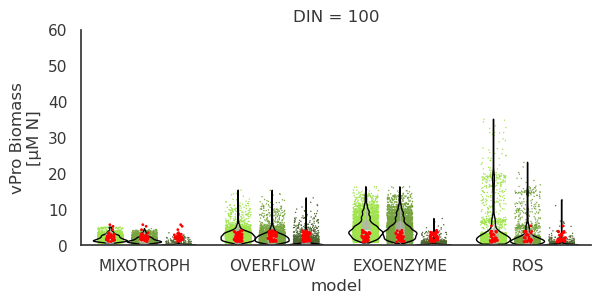

/tmp/ipykernel_300854/2176499711.py:32: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.stripplot(
/tmp/ipykernel_300854/2176499711.py:42: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


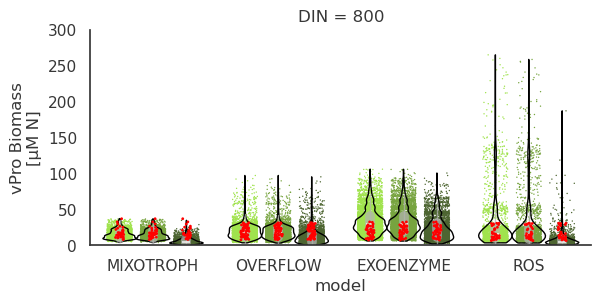

/tmp/ipykernel_300854/2176499711.py:32: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.stripplot(


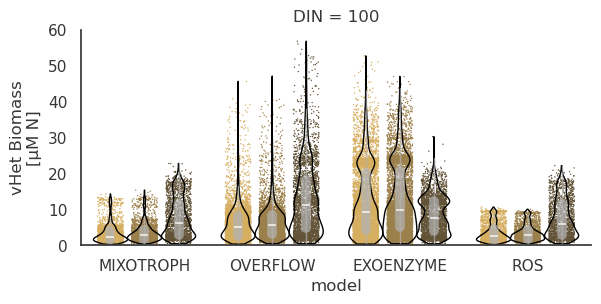

/tmp/ipykernel_300854/2176499711.py:32: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.stripplot(


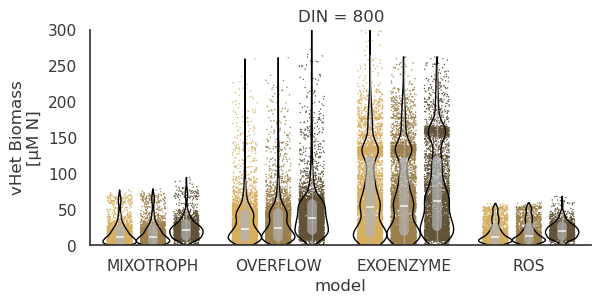

In [51]:
for c in ['Integrated N Biomassp', 'Integrated N Biomassh',]:
    for din in [100,800]:
        strain = c[-1]
        color = PCOLOR if strain == 'p' else HCOLOR
        palette = sns.dark_palette(color, reverse=True, n_colors=4)
        ponly_palette = sns.dark_palette('red', reverse=True, n_colors=1)
        ymax = 60 if din == 100 else 300
        title = 'vPro Biomass' if strain == 'p' else 'vHet Biomass'
        
        g = sns.catplot(
            data=comb_df.loc[comb_df.DIN.isin([din])], 
             y=c, 
            hue='DOC', #hue_order=gorder1, 
            #palette=gpalette1,
            palette=['black','black','black',],
            x='model', order=morder,
            kind='violin', #split=True,
            aspect=2,
            linewidth=1, 
            height=3,
            #size=4, dodge=True, jitter=0.5,
            #split=True,
            common_norm=False, cut=0, density_norm='width',
            fill=None,
            #inner='quart',
             inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
            #log_scale=True,
             #inner_kws=dict( box_width=5, color=".7", ),
            linecolor='grey',
            legend=False,
        )
        sns.stripplot(
            data=comb_df.loc[comb_df.DIN.isin([din])], 
             y=c, 
            hue='DOC', #hue_order=gorder1, palette=gpalette1,
            palette=palette,
            x='model', order=morder,
            size=1, dodge=True, jitter=0.3, zorder=-100,
            legend=False,
        )
        if strain == 'p':
            sns.stripplot(
                data=ponly_df.loc[ponly_df.DIN.isin([din])], 
                 y=c, 
                hue='DOC', #hue_order=gorder1, palette=gpalette1,
                palette=ponly_palette,
                #palette=palette,
                x='model', order=morder,
                size=2, 
                dodge=True, #jitter=0.3,
                zorder=100,
                legend=False,
            )
        g.set(ylim=(0,ymax), title=f'DIN = {din}', ylabel=f'{title}\n[µM N]')
        
        # if c == 'Final Organic C':
        #     g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
        #g.set(ylabel=stage)
        #g.set(#ylim=(5e-2,20),
        #      yscale='log')
        #plt.axhline(1,lw=1, ls='--')
        #plt.xticks(rotation=90)
        plt.show()

/tmp/ipykernel_300854/3953455610.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.catplot(


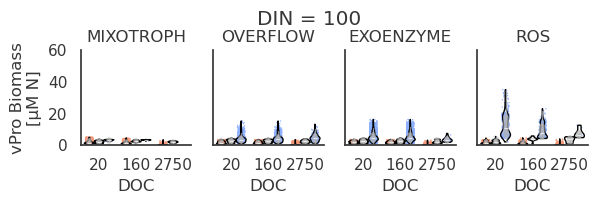

/tmp/ipykernel_300854/3953455610.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.catplot(


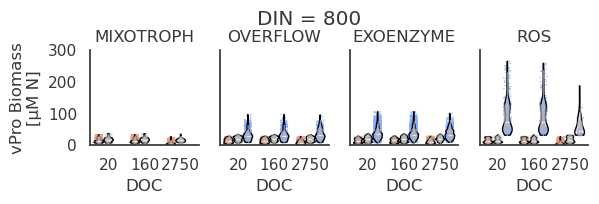

/tmp/ipykernel_300854/3953455610.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.catplot(


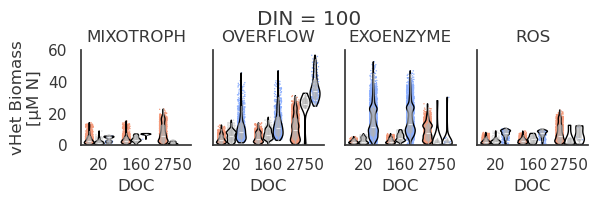

/tmp/ipykernel_300854/3953455610.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.catplot(


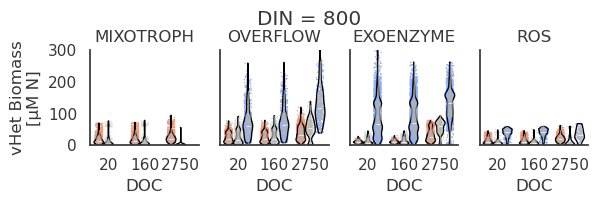

In [187]:
for c in ['Integrated N Biomassp', 'Integrated N Biomassh',]:
    for din in [100,800]:
        strain = c[-1]
        color = PCOLOR if strain == 'p' else HCOLOR
        palette = sns.dark_palette(color, reverse=True, n_colors=4)
        ponly_palette = sns.dark_palette('red', reverse=True, n_colors=1)
        ymax = 60 if din == 100 else 300
        title = 'vPro Biomass' if strain == 'p' else 'vHet Biomass'
        
        g = sns.catplot(
            data=merge_comb_df.loc[merge_comb_df.DIN.isin([din])], 
             y=c, 
            hue='interaction_class', hue_order=iorder, 
            col='model', col_order=morder,
            #palette=gpalette1,
            palette=['black','black','black','black'],
            x='DOC', #order=morder,
            kind='violin', #split=True,
            aspect=0.75,
            linewidth=1, 
            height=2,
            #size=4, dodge=True, jitter=0.5,
            #split=True,
            common_norm=False, cut=0, density_norm='width',
            fill=None,
            #inner='quart',
             inner_kws=dict(box_width=4, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
            #log_scale=True,
             #inner_kws=dict( box_width=5, color=".7", ),
            linecolor='grey',
            legend=False,
        )
        for col_val, ax in g.axes_dict.items():
            sns.stripplot(
                data=merge_comb_df.loc[merge_comb_df.DIN.isin([din]) & merge_comb_df.model.isin([col_val])], 
                 y=c, 
                hue='interaction_class', hue_order=iorder, 
                palette=ipalette,
                x='DOC', #order=morder,
                size=1, dodge=True, jitter=0.3, zorder=-100,
                legend=False,
                ax=ax,
            )
        g.set(ylim=(0,ymax),  ylabel=f'{title}\n[µM N]')
        g.set_titles(col_template='{col_name}', row_template='DOC = {row_name}')
        plt.suptitle(f'DIN = {din}',y=1.01)
        
        # if c == 'Final Organic C':
        #     g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
        #g.set(ylabel=stage)
        #g.set(#ylim=(5e-2,20),
        #      yscale='log')
        #plt.axhline(1,lw=1, ls='--')
        #plt.xticks(rotation=90)
        plt.show()

In [52]:
count_df = merge_comb_df.pivot_table(index=['Category', 'DIN', 'DOC', 'model'], columns='interaction_class', values='run_id', aggfunc='count', fill_value=0).reset_index()

interaction_class,Negative,Neutral,Positive
model,,,
MIXOTROPH,79.022148,18.219808,2.758044
OVERFLOW,40.726382,29.463375,29.810243
EXOENZYME,7.334073,13.099952,79.565975
ROS,68.456679,12.590253,18.953069


interaction_class,Negative,Neutral,Positive
model,,,
MIXOTROPH,95.606253,2.999578,1.394170
OVERFLOW,66.060110,14.843590,19.096299
EXOENZYME,18.471134,9.067648,72.461219
ROS,84.463277,1.930320,13.606403


interaction_class,Negative,Neutral,Positive
model,,,
MIXOTROPH,99.592461,0.407539,0.000000
OVERFLOW,91.277562,1.945525,6.776913
EXOENZYME,98.436932,0.545256,1.017812
ROS,99.189815,0.347222,0.462963


interaction_class,Negative,Neutral,Positive
model,,,
MIXOTROPH,68.400688,31.599312,0.000000
OVERFLOW,44.359975,39.469899,16.170125
EXOENZYME,2.922490,16.677255,80.400254
ROS,57.300275,23.461892,19.237833


interaction_class,Negative,Neutral,Positive
model,,,
MIXOTROPH,75.389948,24.610052,0.000000
OVERFLOW,49.815043,34.792437,15.392520
EXOENZYME,4.336694,17.266763,78.396543
ROS,65.537757,15.148741,19.313501


interaction_class,Negative,Neutral,Positive
model,,,
MIXOTROPH,97.314453,2.685547,0.000000
OVERFLOW,84.673249,6.793606,8.533145
EXOENZYME,43.729450,13.715359,42.555190
ROS,93.984109,3.291714,2.724177


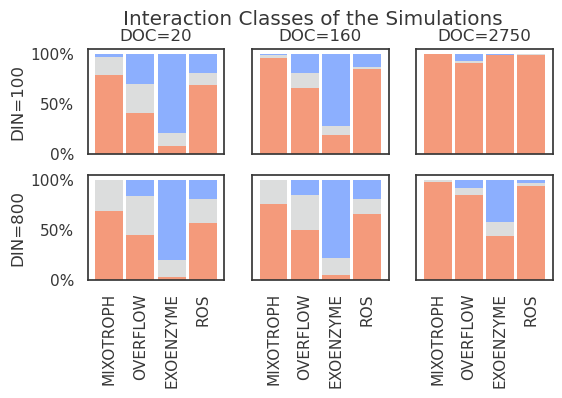

In [249]:
import matplotlib.ticker as mtick
doc_order = [20,160,2750]
din_order = [100,800]

fig, axes = plt.subplots(len(din_order),len(doc_order), figsize=(6,3), sharex=True , sharey=True)

# all simulations row
                         
for row_idx, din_val  in enumerate(din_order):
    for doc_val, ax in zip(doc_order, axes[row_idx]):

        #cdf = count_df.copy()
        tdf = count_df.loc[count_df['DOC'].isin([doc_val]) & count_df['DIN'].isin([din_val])]
        cdf = tdf[iorder].div(tdf[iorder].sum(axis=1), axis=0) * 100
        
        cdf.index=tdf.model 
        cdf = cdf.reindex(index=morder)
        title = f'DOC={doc_val}'
        ylabel = f'DIN={din_val}'
        if row_idx != 0 :
            title=''
        if doc_val != doc_order[0]:
            ylabel=''
        display(cdf)
        cdf[iorder].plot(
            kind='bar', stacked=True, color=ipalette, width=0.9, #figsize=(3,3),
            rot=90, lw=0.01, 
            ylabel=ylabel, title=title, legend=False,
            xlabel='',
            #title='Breakdown of Simulations per Phenotype',
            ax=ax
        )
plt.suptitle('Interaction Classes of the Simulations', y=1.01)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#fig.legend(loc='lower center', ncol=3)

plt.xticks(rotation=90)
save_fpath = os.path.join(save_dpath, 'fig_interaction_classes.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)            

In [87]:
sns.color_palette(ipalette)

[(0.9568627450980393, 0.6039215686274509, 0.4823529411764706),
 (0.8627450980392157, 0.8666666666666667, 0.8666666666666667),
 (0.5490196078431373, 0.6862745098039216, 0.996078431372549)]

In [98]:
percent_count_df = count_df.copy()
percent_count_df[iorder] = percent_count_df[iorder].div(percent_count_df[iorder].sum(axis=1), axis=0) * 100


In [101]:
for m in morder:
    display(percent_count_df.loc[percent_count_df.model.isin([m])])

interaction_class,Category,DIN,DOC,model,Negative,Neutral,Positive
1,DIN800,800,20,MIXOTROPH,68.400688,31.599312,0.000000
5,DIN800DOC160,800,160,MIXOTROPH,75.389948,24.610052,0.000000
9,DIN800DOC2750,800,2750,MIXOTROPH,97.314453,2.685547,0.000000
13,DOC160,100,160,MIXOTROPH,95.606253,2.999578,1.394170
17,DOC2750,100,2750,MIXOTROPH,99.592461,0.407539,0.000000
21,Original,100,20,MIXOTROPH,79.022148,18.219808,2.758044


interaction_class,Category,DIN,DOC,model,Negative,Neutral,Positive
2,DIN800,800,20,OVERFLOW,44.359975,39.469899,16.170125
6,DIN800DOC160,800,160,OVERFLOW,49.815043,34.792437,15.392520
10,DIN800DOC2750,800,2750,OVERFLOW,84.673249,6.793606,8.533145
14,DOC160,100,160,OVERFLOW,66.060110,14.843590,19.096299
18,DOC2750,100,2750,OVERFLOW,91.277562,1.945525,6.776913
22,Original,100,20,OVERFLOW,40.726382,29.463375,29.810243


interaction_class,Category,DIN,DOC,model,Negative,Neutral,Positive
0,DIN800,800,20,EXOENZYME,2.922490,16.677255,80.400254
4,DIN800DOC160,800,160,EXOENZYME,4.336694,17.266763,78.396543
8,DIN800DOC2750,800,2750,EXOENZYME,43.729450,13.715359,42.555190
12,DOC160,100,160,EXOENZYME,18.471134,9.067648,72.461219
16,DOC2750,100,2750,EXOENZYME,98.436932,0.545256,1.017812
20,Original,100,20,EXOENZYME,7.334073,13.099952,79.565975


interaction_class,Category,DIN,DOC,model,Negative,Neutral,Positive
3,DIN800,800,20,ROS,57.300275,23.461892,19.237833
7,DIN800DOC160,800,160,ROS,65.537757,15.148741,19.313501
11,DIN800DOC2750,800,2750,ROS,93.984109,3.291714,2.724177
15,DOC160,100,160,ROS,84.463277,1.930320,13.606403
19,DOC2750,100,2750,ROS,99.189815,0.347222,0.462963
23,Original,100,20,ROS,68.456679,12.590253,18.953069


In [102]:
percent_count_df.loc[~percent_count_df.Category.isin(['DOC2750', 'DIN800DOC2750'])].groupby('model')[['Positive', 'Negative']].describe().T


model                    EXOENZYME  MIXOTROPH   OVERFLOW        ROS
interaction_class                                                  
Positive          count   4.000000   4.000000   4.000000   4.000000
                  mean   77.705998   1.038054  20.117297  17.777701
                  std     3.591801   1.321653   6.655808   2.785192
                  min    72.461219   0.000000  15.392520  13.606403
                  25%    76.912712   0.000000  15.975724  17.616402
                  50%    78.981259   0.697085  17.633212  19.095451
                  75%    79.774545   1.735138  21.774785  19.256750
                  max    80.400254   2.758044  29.810243  19.313501
Negative          count   4.000000   4.000000   4.000000   4.000000
                  mean    8.266098  79.604759  50.240378  68.939497
                  std     7.047595  11.542430  11.188388  11.376352
                  min     2.922490  68.400688  40.726382  57.300275
                  25%     3.983143  73.642633  43.451577  63.478387
                  50%     5.835383  77.206048  47.087509  66.997218
                  75%    10.118338  83.168174  53.876310  72.458328
                  max    18.471134  95.606253  66.060110  84.463277

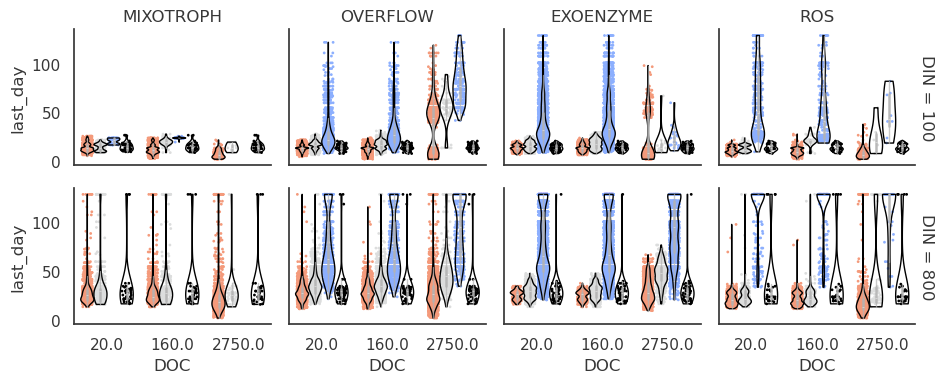

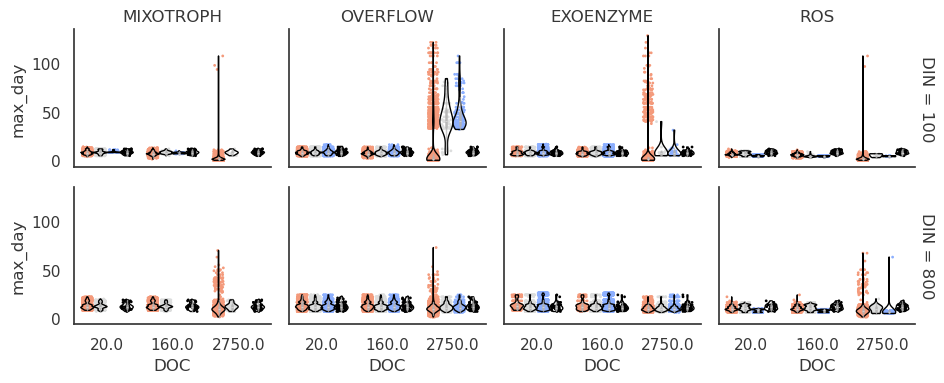

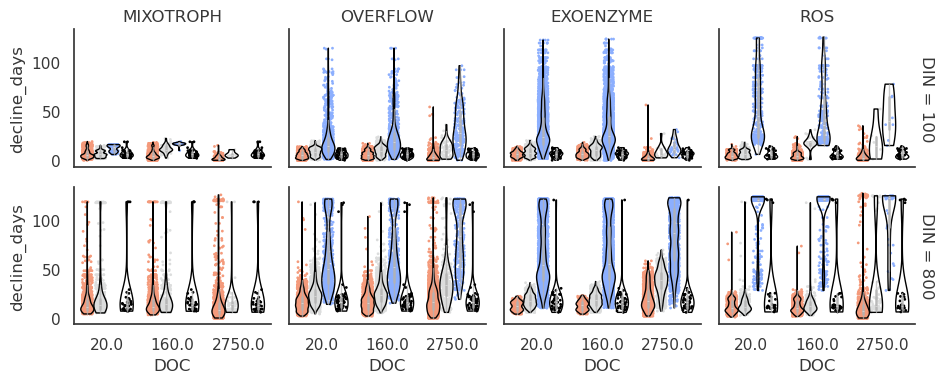

In [192]:
for c in ['last_day','max_day',  'decline_days']:
        strain = c[-1]
        color = PCOLOR if strain == 'p' else HCOLOR
        palette = sns.dark_palette(color, reverse=True, n_colors=4)
        ponly_palette = sns.dark_palette('red', reverse=True, n_colors=1)
        ymax = 60 if din == 100 else 300
        title = 'vPro Biomass' if strain == 'p' else 'vHet Biomass'
        
        g = sns.catplot(
            data=max_day_df, 
             y=c, 
            hue='interaction_class', hue_order=iorder1, 
            col='model', col_order=morder,
            row='DIN',
            #palette=gpalette1,
            palette=['black','black','black','black'],
            x='DOC', #order=morder,
            kind='violin', #split=True,
            aspect=1.2,
            linewidth=1, 
            height=2,
            #size=4, dodge=True, jitter=0.5,
            #split=True,
            common_norm=False, cut=0, density_norm='width',
            fill=None,
            #inner='quart',
             inner_kws=dict(box_width=2, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
            #log_scale=True,
             #inner_kws=dict( box_width=5, color=".7", ),
            linecolor='grey',
            legend=False,
            margin_titles=True,
        )
        for (row_val,col_val), ax in g.axes_dict.items():
            sns.stripplot(
                data=max_day_df.loc[max_day_df.DIN.isin([row_val]) & max_day_df.model.isin([col_val])], 
                 y=c, 
                hue='interaction_class', hue_order=iorder1, 
                palette=ipalette1,
                x='DOC', #order=morder,
                size=2, dodge=True, jitter=0.3, zorder=-100,
                legend=False,
                ax=ax,
            )
        #g.set(ylim=(0,ymax),  ylabel=f'{title}\n[µM N]')
        g.set_titles(col_template='{col_name}', row_template='DIN = {row_name:.0f}')
        
        # if c == 'Final Organic C':
        #     g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
        #g.set(ylabel=stage)
        #g.set(#ylim=(5e-2,20),
        #      yscale='log')
        #plt.axhline(1,lw=1, ls='--')
        #plt.xticks(rotation=90)
        plt.show()

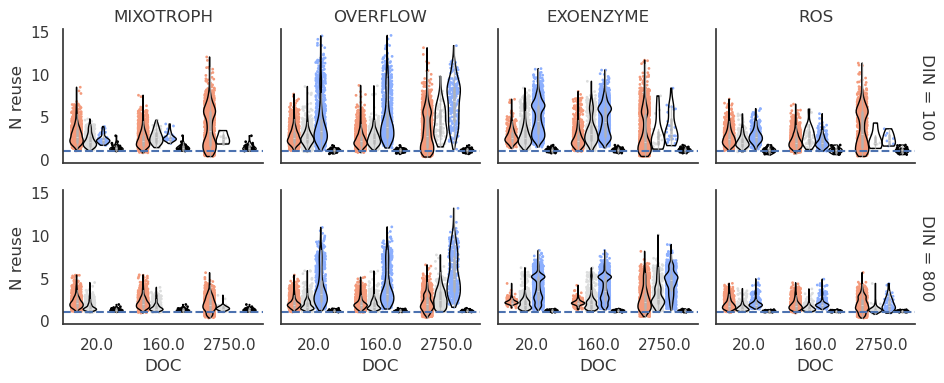

In [243]:
for c in ['N reuse']:
        g = sns.catplot(
            data=merge_comb_df2, 
             y=c, 
            hue='interaction_class', hue_order=iorder1, 
            col='model', col_order=morder,
            row='DIN',
            #palette=gpalette1,
            palette=['black','black','black','black'],
            x='DOC', #order=morder,
            kind='violin', #split=True,
            aspect=1.2,
            linewidth=1, 
            height=2,
            #size=4, dodge=True, jitter=0.5,
            #split=True,
            common_norm=False, cut=0, density_norm='width',
            fill=None,
            #inner='quart',
             inner_kws=dict(box_width=2, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
            #log_scale=True,
             #inner_kws=dict( box_width=5, color=".7", ),
            linecolor='grey',
            legend=False,
            margin_titles=True,
        )
        for (row_val,col_val), ax in g.axes_dict.items():
            sns.stripplot(
                data=merge_comb_df2.loc[merge_comb_df2.DIN.isin([row_val]) & merge_comb_df2.model.isin([col_val])], 
                 y=c, 
                hue='interaction_class', hue_order=iorder1, 
                palette=ipalette1,
                x='DOC', #order=morder,
                size=2, dodge=True, jitter=0.3, zorder=-100,
                legend=False,
                ax=ax,
            )
            ax.axhline(1, ls='--')
        #g.set(ylim=(0,ymax),  ylabel=f'{title}\n[µM N]')
        g.set_titles(col_template='{col_name}', row_template='DIN = {row_name:.0f}')
        
        # if c == 'Final Organic C':
        #     g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
        #g.set(ylabel=stage)
        #g.set(#ylim=(5e-2,20),
        #      yscale='log')
        #plt.axhline(1,lw=1, ls='--')
        #plt.xticks(rotation=90)
        plt.show()

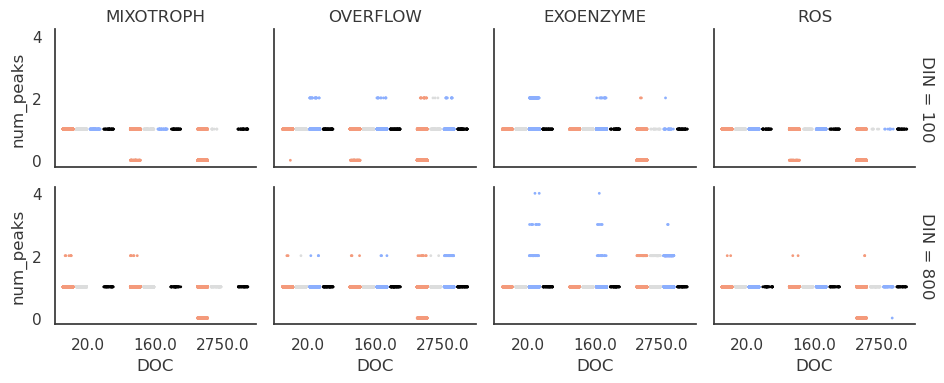

In [193]:
for c in ['num_peaks']:
        strain = c[-1]
        color = PCOLOR if strain == 'p' else HCOLOR
        palette = sns.dark_palette(color, reverse=True, n_colors=4)
        ponly_palette = sns.dark_palette('red', reverse=True, n_colors=1)
        ymax = 60 if din == 100 else 300
        title = 'vPro Biomass' if strain == 'p' else 'vHet Biomass'
        
        g = sns.catplot(
            data=max_day_df, 
             y=c, 
            hue='interaction_class', hue_order=iorder1, 
            col='model', col_order=morder,
            row='DIN',
            #palette=gpalette1,
            palette=ipalette1,
            x='DOC', #order=morder,
            kind='strip', #split=True,
            aspect=1.2,
            #linewidth=0, 
            height=2,
                size=2, dodge=True, jitter=0.3, zorder=-100,
            legend=False,
            margin_titles=True,
        )
        #g.set(ylim=(0,ymax),  ylabel=f'{title}\n[µM N]')
        g.set_titles(col_template='{col_name}', row_template='DIN = {row_name:.0f}')
        
        # if c == 'Final Organic C':
        #     g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
        #g.set(ylabel=stage)
        #g.set(#ylim=(5e-2,20),
        #      yscale='log')
        #plt.axhline(1,lw=1, ls='--')
        #plt.xticks(rotation=90)
        plt.show()

In [194]:
max_day_df.loc[max_day_df.num_peaks.gt(1) & max_day_df.model.isin(morder)].pivot_table(
    index=['Simulation', 'Category','model',  ],
    columns='num_peaks',
    values='max_day', aggfunc='count', fill_value=0, 
)# .reset_index()

num_peaks                             2  3  4
Simulation Category      model               
Coculture  DIN800        EXOENZYME   30  9  2
                         MIXOTROPH    6  0  0
                         OVERFLOW     6  0  0
                         ROS          2  0  0
           DIN800DOC160  EXOENZYME   16  5  1
                         MIXOTROPH    6  0  0
                         OVERFLOW     6  0  0
                         ROS          2  0  0
           DIN800DOC2750 EXOENZYME  411  2  0
                         OVERFLOW    41  0  0
                         ROS          2  0  0
           DOC160        EXOENZYME   13  0  0
                         OVERFLOW    11  0  0
           DOC2750       EXOENZYME    3  0  0
                         OVERFLOW    26  0  0
           Original      EXOENZYME   95  0  0
                         OVERFLOW    18  0  0

In [198]:
max_day_df['num_peaks_binned'] = max_day_df['num_peaks'].astype(str) 
max_day_df.loc[max_day_df.num_peaks.gt(1), 'num_peaks_binned'] = '>1'

In [216]:
peak_count_df = max_day_df.pivot_table(index=['Category', 'DIN', 'DOC', 'model'], columns='num_peaks_binned', values='run_id', aggfunc='count', fill_value=0).reset_index()

In [217]:
porder = ['0','1','>1']
ppalette = sns.color_palette('Set1', n_colors=3).as_hex()

num_peaks_binned,0,1,>1
model,,,
MIXOTROPH,0.000000,100.000000,0.000000
OVERFLOW,0.020178,99.616626,0.363196
EXOENZYME,0.000000,98.505349,1.494651
ROS,0.000000,100.000000,0.000000


num_peaks_binned,0,1,>1
model,,,
MIXOTROPH,2.997502,97.002498,0.000000
OVERFLOW,1.395067,98.382531,0.222402
EXOENZYME,0.000000,99.793520,0.206480
ROS,2.181987,97.818013,0.000000


num_peaks_binned,0,1,>1
model,,,
MIXOTROPH,89.339339,10.660661,0.000000
OVERFLOW,70.086015,29.085696,0.828289
EXOENZYME,84.144596,15.748031,0.107373
ROS,84.243458,15.756542,0.000000


num_peaks_binned,0,1,>1
model,,,
MIXOTROPH,0.0,99.745870,0.254130
OVERFLOW,0.0,99.878098,0.121902
EXOENZYME,0.0,99.353210,0.646790
ROS,0.0,99.909420,0.090580


num_peaks_binned,0,1,>1
model,,,
MIXOTROPH,0.0,99.743918,0.256082
OVERFLOW,0.0,99.878074,0.121926
EXOENZYME,0.0,99.650350,0.349650
ROS,0.0,99.909707,0.090293


num_peaks_binned,0,1,>1
model,,,
MIXOTROPH,9.265482,90.734518,0.000000
OVERFLOW,3.782780,95.265723,0.951497
EXOENZYME,0.000000,90.397582,9.602418
ROS,8.091518,91.796875,0.111607


(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

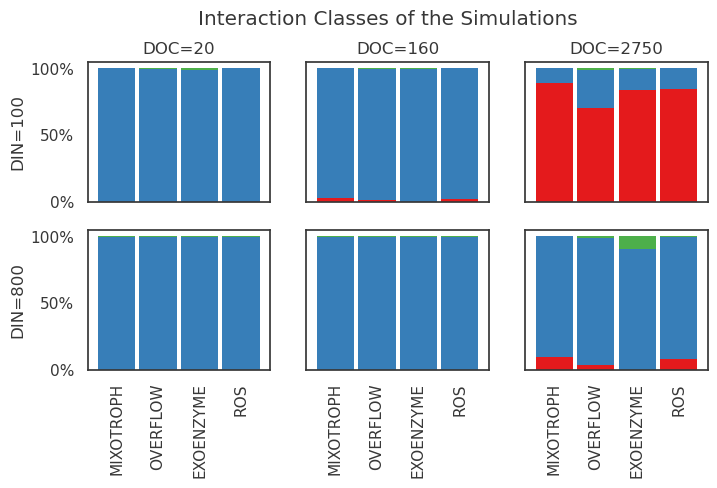

In [218]:
import matplotlib.ticker as mtick
doc_order = [20,160,2750]
din_order = [100,800]


fig, axes = plt.subplots(len(din_order),len(doc_order), figsize=(8,4), sharex=True , sharey=True)

# all simulations row
                         
for row_idx, din_val  in enumerate(din_order):
    for doc_val, ax in zip(doc_order, axes[row_idx]):

        #cdf = count_df.copy()
        tdf = peak_count_df.loc[peak_count_df['DOC'].isin([doc_val]) & peak_count_df['DIN'].isin([din_val])]
        cdf = tdf[porder].div(tdf[porder].sum(axis=1), axis=0) * 100
        
        cdf.index=tdf.model 
        cdf = cdf.reindex(index=morder)
        title = f'DOC={doc_val}'
        ylabel = f'DIN={din_val}'
        if row_idx != 0 :
            title=''
        if doc_val != doc_order[0]:
            ylabel=''
        display(cdf)
        cdf[porder].plot(
            kind='bar', stacked=True, color=ppalette, width=0.9, #figsize=(3,3),
            rot=90, lw=0.01, 
            ylabel=ylabel, title=title, legend=False,
            xlabel='',
            #title='Breakdown of Simulations per Phenotype',
            ax=ax
        )
plt.suptitle('Interaction Classes of the Simulations', y=1.01)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#fig.legend(loc='lower center', ncol=3)

plt.xticks(rotation=90)

In [219]:
percent_peak_count_df = peak_count_df.copy()
percent_peak_count_df[porder] = percent_peak_count_df[porder].div(percent_peak_count_df[porder].sum(axis=1), axis=0) * 100


/tmp/ipykernel_300854/47308355.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(


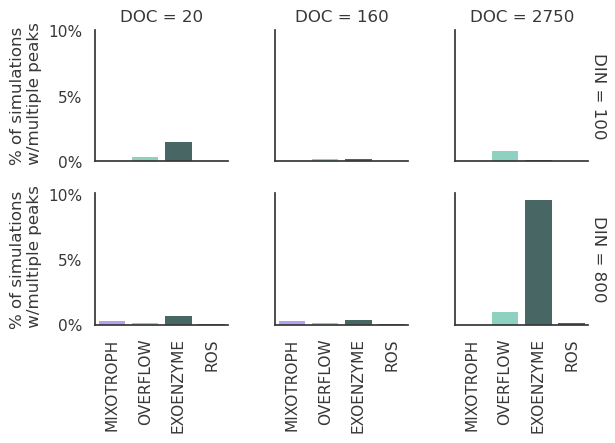

In [235]:
g = sns.catplot(
    data=percent_peak_count_df,
    y='>1', x='model', kind='bar', order=morder, hue='model', palette=mpalette, 
    row='DIN', col='DOC',
    height=2,
    margin_titles=True,
)
g.set(ylabel='% of simulations\n w/multiple peaks', xlabel='')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
g.set_titles(col_template='DOC = {col_name:.0f}', row_template='DIN = {row_name:.0f}')

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)


In [236]:
sns.color_palette(ipalette1)

[(0.9568627450980393, 0.6039215686274509, 0.4823529411764706),
 (0.8627450980392157, 0.8666666666666667, 0.8666666666666667),
 (0.5490196078431373, 0.6862745098039216, 0.996078431372549),
 (0.0, 0.0, 0.0)]

In [209]:
percent_count_df.describe()

num_peaks_binned,DIN,DOC,0,1,>1
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,450.000000,976.666667,15.316802,84.147911,0.535288
std,355.983339,1276.696527,31.356815,31.213698,1.746232
min,100.000000,20.000000,0.000000,9.474261,0.000000
25%,100.000000,20.000000,0.000000,91.000107,0.000000
50%,450.000000,160.000000,0.000000,98.929280,0.109490
75%,800.000000,2750.000000,7.060140,99.872670,0.255594
max,800.000000,2750.000000,90.525739,100.000000,9.602418


In [237]:
max_day_df.groupby('interaction_class').decline_days.describe().T

interaction_class,Ctrl,Negative,Neutral,Positive
count,1304.000000,35428.000000,13354.000000,27563.000000
mean,14.147298,10.983196,17.854635,51.295790
std,20.364555,11.885350,14.298840,34.973674
min,0.000000,0.000000,0.000000,0.000000
25%,5.892361,4.051389,8.965972,22.993056
50%,9.743056,7.947917,14.152778,41.963194
75%,14.900000,14.152778,23.052778,72.904861
max,120.783333,126.602778,124.065972,125.013194


In [239]:
max_day_df.groupby('interaction_class').max_day.describe().T
max_day_df.groupby(['Simulation', 'Category']).max_day.describe().T

Simulation     Coculture                                            \
Category          DIN800  DIN800DOC160 DIN800DOC2750        DOC160   
count       17757.000000  17695.000000  14245.000000  17753.000000   
mean           11.864358     11.815003      9.896759      7.093376   
std             3.765480      3.703481      5.260569      2.141742   
min             5.720139      5.720139      1.081944      1.081944   
25%             8.943750      8.943750      7.984028      5.720139   
50%            11.718056     10.834722      8.943750      6.731944   
75%            13.695833     13.695833     10.834722      7.984028   
max            25.734722     25.734722     86.892361     16.140972   

Simulation                             vPro Monoculture               \
Category         DOC2750      Original           DIN800 DIN800DOC160   
count       11352.000000  17948.000000       163.000000   163.000000   
mean            6.217005      7.699749        11.929294    11.912568   
std            16.132141      2.173800         3.479808     3.487704   
min             0.000000      2.747222         6.731944     6.731944   
25%             1.081944      5.720139         8.943750     8.943750   
50%             1.081944      7.984028        11.718056    11.718056   
75%             2.164583      8.943750        13.695833    13.695833   
max           128.767361     16.727083        23.898611    23.898611   

Simulation                                                                  \
Category   DIN800DOC2500 DIN800DOC2750      DOC160     DOC2500     DOC2750   
count         163.000000    163.000000  163.000000  163.000000  163.000000   
mean           11.904887     11.904887    8.165555    8.165555    8.165555   
std             3.497774      3.497774    2.144578    2.144578    2.144578   
min             6.731944      6.731944    4.701389    4.701389    4.701389   
25%             8.943750      8.943750    6.731944    6.731944    6.731944   
50%            11.718056     11.718056    7.984028    7.984028    7.984028   
75%            13.695833     13.695833    9.745833    9.745833    9.745833   
max            23.898611     23.898611   13.695833   13.695833   13.695833   

Simulation              
Category      Original  
count       163.000000  
mean          8.179486  
std           2.132926  
min           4.701389  
25%           6.731944  
50%           7.984028  
75%           9.745833  
max          13.695833

In [180]:
max_day_df.loc[max_day_df.num_peaks.gt(1) & max_day_df.model.isin(morder)].pivot_table(
    index=['model', 'Category', ],
    columns='num_peaks',
    values='max_day', aggfunc='count', fill_value=0, 
)# .reset_index()

num_peaks                  2   3  4  5
model     Category                    
EXOENZYME DIN800          45  14  1  1
          DIN800DOC160    34  10  1  0
          DIN800DOC2750  641   2  1  0
          DOC160         428   0  0  0
          DOC2750         20   0  0  0
          Original       834   1  0  0
MIXOTROPH DIN800          14   0  0  0
          DIN800DOC160    16   0  0  0
          DIN800DOC2750   26   0  0  0
OVERFLOW  DIN800          28   1  0  0
          DIN800DOC160    26   1  0  0
          DIN800DOC2750   71   0  0  0
          DOC160          35   0  0  0
          DOC2750         89   2  0  0
          Original        58   0  0  0
ROS       DIN800          11   1  0  0
          DIN800DOC160    12   1  0  0
          DIN800DOC2750   23   0  0  0

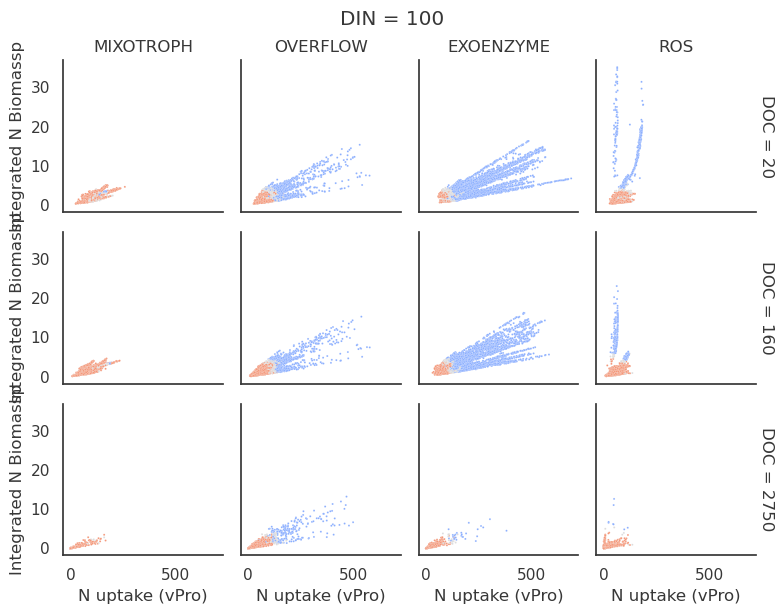

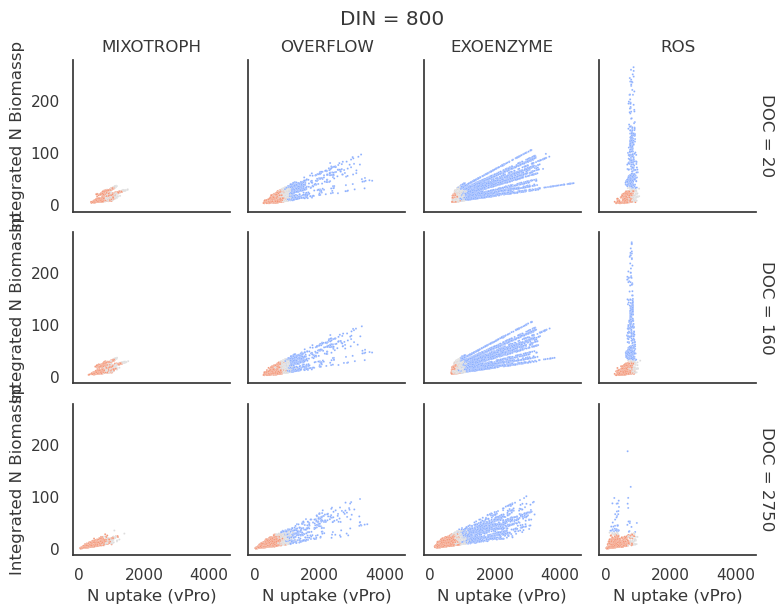

In [49]:
merge_comb_df['N uptake (vPro)'] = merge_comb_df['Integrated Uptake INp'] + merge_comb_df['Integrated Uptake ONp']
merge_comb_df['N uptake (vHet)'] = merge_comb_df['Integrated Uptake INh'] + merge_comb_df['Integrated Uptake ONh']

for din in [100,800]:
    g = sns.relplot(
        data=merge_comb_df.loc[merge_comb_df.DIN.isin([din])], 
         x='N uptake (vPro)', y='Integrated N Biomassp',
        #hue='y_pred', hue_order=list(reversed(gorder)), palette=list(reversed(gpalette)),
        hue='interaction_class', hue_order=iorder, palette=ipalette,
        col='model', col_order=morder, s=2, lw=0.1,
        row='DOC', 
        #row='Category', row_order=media_order[1:],
        legend=False, 
        aspect=1, height=2,rasterized=True,
        facet_kws=dict(margin_titles=True),
        #color='purple',
    )
    # for (row_val, col_val), ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    #     ponly_values = ponly_df.loc[ponly_df.DIN.isin([din]) & ponly_df.DOC.isin([row_val]) & ponly_df.model.isin([col_val]), 'Integrated N Biomassp']
    #     ax.axhspan(ponly_values.min(), ponly_values.max(), alpha=0.1, zorder=-100, color='orange')
    
    # g.set(ylabel='vPro Biomass\n[µM N]', xlabel='vHet Biomass\n[µM N]', 
    #       #xlim=(-1,60), 
    #       #ylim=(-1,60), 
    #      )
    # if (din == 100):
    #     g.set(xlim=(-1,60), ylim=(-1,60), )
    # else:
    #     g.set(xlim=(-1,300), ylim=(-1,300), )

    g.set_titles(col_template='{col_name}', row_template='DOC = {row_name}')
    plt.suptitle(f'DIN = {din}',y=1.02)
            

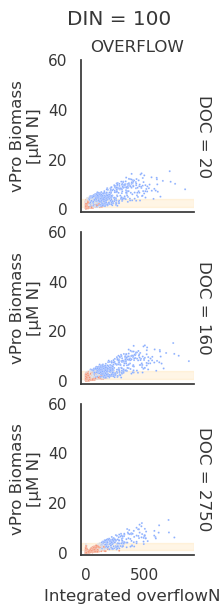

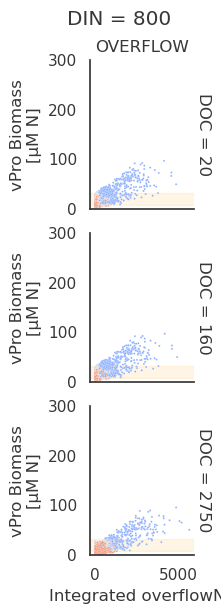

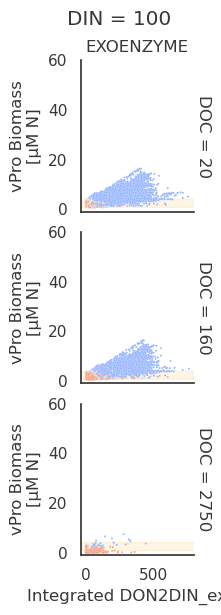

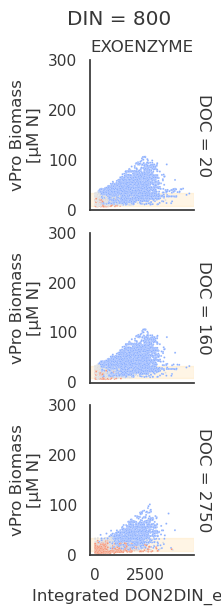

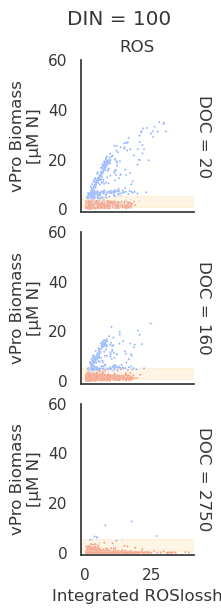

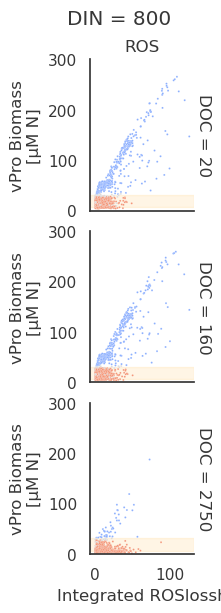

In [50]:
for (m,col) in [
    ('OVERFLOW', 'Integrated overflowNh'),
    ('EXOENZYME', 'Integrated DON2DIN_exoh'),
    ('ROS', 'Integrated ROSlossh')
]:
    for din in [100,800]:
        g = sns.relplot(
            data=merge_comb_df.loc[merge_comb_df.DIN.isin([din]) & merge_comb_df.model.isin([m])], 
             y='Integrated N Biomassp', x=col,
            #hue='y_pred', hue_order=list(reversed(gorder)), palette=list(reversed(gpalette)),
            hue='interaction_class', hue_order=iorder, palette=ipalette,
            col='model', #col_order=morder, 
            s=2, lw=0.1,
            row='DOC', 
            #row='Category', row_order=media_order[1:],
            legend=False, 
            aspect=1.1, height=2,rasterized=True,
            facet_kws=dict(margin_titles=True),
            #color='purple',
        )
        for (row_val, col_val), ax in g.axes_dict.items():
            #ax.axline((0,0), (20,20),lw=1, ls='--')
            ponly_values = ponly_df.loc[ponly_df.DIN.isin([din]) & ponly_df.DOC.isin([row_val]) & ponly_df.model.isin([col_val]), 'Integrated N Biomassp']
            ax.axhspan(ponly_values.min(), ponly_values.max(), alpha=0.1, zorder=-100, color='orange')
        
        g.set(ylabel='vPro Biomass\n[µM N]', 
              #xlim=(-1,60), 
              #ylim=(-1,60), 
             )
        if (din == 100):
            g.set( ylim=(-1,60), )
        else:
            g.set( ylim=(-1,300), )
    
        g.set_titles(col_template='{col_name}', row_template='DOC = {row_name}')
        plt.suptitle(f'DIN = {din}',y=1.02)
            